In [16]:
#Task 2 question is mentiontioned in TASK#1



In [121]:
# Import the diabetes dataset. You can find data description in the description file.
# Use pandas plots to have a look and feel of the different attributes of the data.
# Apply perceptron algorithm to model the data distribution.
# Use mean squared error as your cost/ error function.
# Use the below given derivatives to find gradients of each W.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("diabetes.txt",delimiter = "\t")

In [3]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


<AxesSubplot:>

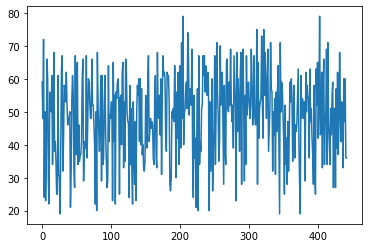

In [5]:
df['AGE'].plot.line()

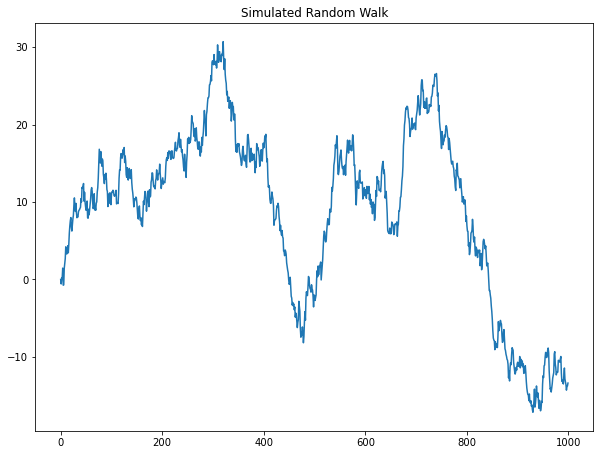

In [6]:
import numpy as np
import random
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = [10 , 10]
steps = np.random.standard_normal(1000)
steps[0]=0

random_walk = np.cumsum(steps)
random_walk[:10]

# plot_acf(random_walk, lags=20);
# df['AGE'].plot.line()
plt.plot(random_walk)
plt.title('Simulated Random Walk')
plt.show()

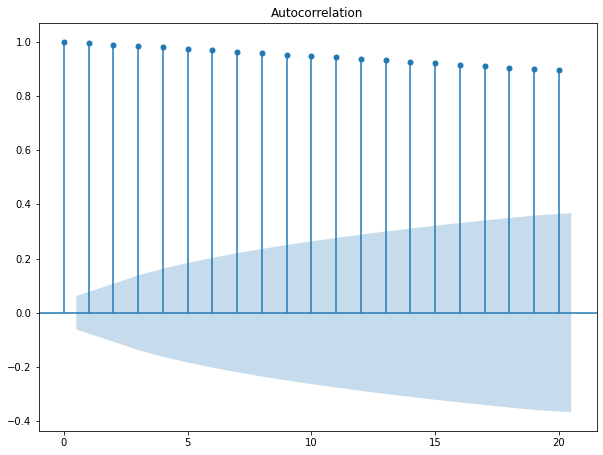

In [127]:
plot_acf(random_walk, lags=20);

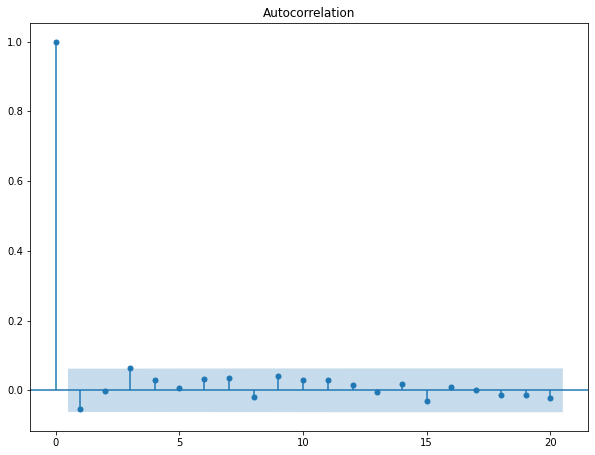

In [128]:
plot_acf(random_walk_diff, lags=20);

In [129]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df[df.columns[-1]], test_size=0.33, random_state=42)

In [130]:
X_train.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
231,51,1,23.5,101.00,195,121.0,51.0,4.00,4.7449,94
325,48,1,31.4,75.33,242,151.6,38.0,6.37,5.5683,103
193,51,2,25.9,76.00,240,169.0,39.0,6.00,5.0752,96
109,59,2,25.5,95.33,190,139.4,35.0,5.43,4.3567,117
195,56,2,28.7,99.00,208,146.4,39.0,5.00,4.7274,97


In [131]:
y_train.head()

231    154
325    192
193    116
109     81
195    122
Name: Y, dtype: int64

In [132]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [133]:
X_test

array([[ 61.    ,   1.    ,  25.8   , ...,   5.    ,   4.9972,  90.    ],
       [ 74.    ,   1.    ,  29.8   , ...,   3.    ,   4.3944,  86.    ],
       [ 66.    ,   2.    ,  26.    , ...,   4.    ,   5.5683,  87.    ],
       ...,
       [ 28.    ,   1.    ,  22.1   , ...,   3.    ,   4.2047,  86.    ],
       [ 41.    ,   1.    ,  30.8   , ...,   7.6   ,   5.1358, 123.    ],
       [ 57.    ,   1.    ,  26.9   , ...,   7.    ,   5.366 ,  96.    ]])

In [134]:
W = np.random.rand(60,1)
W.shape

(60, 1)

In [135]:
X_train[0].shape

(10,)

In [136]:
X_train = X_train.T
X_train.shape

(10, 296)

In [137]:
b = np.random.rand()
b

0.7672873347314711

In [138]:
numOfTrainSamples = X_train.shape[1]
numOfFeatures = X_train.shape[0]
Z = np.zeros(numOfTrainSamples)

for i in range(numOfTrainSamples):
    for j in range(numOfFeatures): 
        z = float(X_train[j][i] * W[j])
        Z[i] = Z[i]+z
    Z[i] = Z[i] + b
    

In [139]:
len(Z)

296

In [140]:
Z[:5]

array([381.81226701, 407.72711231, 412.76537038, 401.7422281 ,
       399.96658391])

In [141]:
W.shape

(60, 1)

In [142]:
X_test =  X_test.T   #testing
X_test.shape

(10, 146)

In [143]:
X_test[0].shape  # for testing

(146,)

In [144]:
X_train.shape

(10, 296)

Part#4 ean squared error as your cost/ error function

In [145]:
from sklearn.metrics import mean_squared_error

In [146]:
# Calculation of Mean Squared Error (MSE)
# MSE = np.square(np.subtract(X_train,X_test)).mean()
# # MSE = np.square(np.subtract(Y_true,Y_pred)).mean() y_test = _test
# MSE
summation = 0  #variable to store the summation of differences
n = len(y_test) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = y_train[i] - y_test[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n
MSE= MSE/n #dividing summation by total values to obtain average
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  74.41884030775005


In [147]:
abc = 1/(1 + np.exp(-z))

In [148]:
A = abc

Part#5 Gradients of each W.

In [149]:
dz = A - y_train

In [150]:
dz.shape

(296,)

In [151]:
dw[:5]

array([ -7547.06081081,   -222.58783784,  -4211.14966216, -14826.52891892,
       -29116.97972973])

In [152]:
numOfTrainSamples

296

In [153]:
dw[:5]

array([ -7547.06081081,   -222.58783784,  -4211.14966216, -14826.52891892,
       -29116.97972973])

In [154]:
# db = np.sum(dz,axis =1)/numOfTrainSamples
dw =  np.dot(X_train,dz.T)/numOfTrainSamples

In [155]:
dw[:5]

array([ -7547.06081081,   -222.58783784,  -4211.14966216, -14826.52891892,
       -29116.97972973])

In [156]:
alpha = 0.01

In [157]:
W = W - alpha * dw